In [36]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from scipy.stats import ttest_1samp  

In [37]:
#Loading the data
df=pd.read_csv(r"C:\Users\A\Documents\Life Expectancy Data.csv")

In [38]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Status,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,...,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.0,59.9,59.9,59.5,59.2,58.8,58.6,58.1,57.5,57.3,...,50.0,48.2,46.6,45.4,44.6,44.3,44.5,44.8,45.3,46.0
Adult Mortality,263.0,271.0,268.0,272.0,275.0,279.0,281.0,287.0,295.0,295.0,...,587.0,632.0,67.0,7.0,717.0,723.0,715.0,73.0,686.0,665.0
infant deaths,62,64,66,69,71,74,77,80,82,84,...,30,30,29,28,28,27,26,25,25,24
Alcohol,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.03,...,4.64,3.56,3.88,4.57,4.14,4.36,4.06,4.43,1.72,1.68
percentage expenditure,71.279624,73.523582,73.219243,78.184215,7.097109,79.679367,56.762217,25.873925,10.910156,17.171518,...,1.040021,20.843429,29.814566,34.262169,8.717409,0.0,0.0,0.0,0.0,0.0
Hepatitis B,65.0,62.0,64.0,67.0,68.0,66.0,63.0,64.0,63.0,64.0,...,73.0,75.0,72.0,68.0,65.0,68.0,7.0,73.0,76.0,79.0
Measles,1154,492,430,2787,3013,1989,2861,1599,1141,1990,...,853,0,242,212,420,31,998,304,529,1483


In [39]:
#inspecting data types
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [40]:
#Handling null values
df.isnull().sum()*100/len(df)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Null values have now been sucessfully removed

In [43]:
#Correlation analyis
corr= df.select_dtypes('number').corr()
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


In [44]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [45]:
df.drop(columns=["Population", "Measles ", "infant deaths", " thinness 5-9 years"], inplace=True)
#these columns are dropped because of multicollinearity or weak correlations

In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Status,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,...,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.0,59.9,59.9,59.5,59.2,58.8,58.6,58.1,57.5,57.3,...,50.0,48.2,46.6,45.4,44.6,44.3,44.5,44.8,45.3,46.0
Adult Mortality,263.0,271.0,268.0,272.0,275.0,279.0,281.0,287.0,295.0,295.0,...,587.0,632.0,67.0,7.0,717.0,723.0,715.0,73.0,686.0,665.0
Alcohol,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.03,...,4.64,3.56,3.88,4.57,4.14,4.36,4.06,4.43,1.72,1.68
percentage expenditure,71.279624,73.523582,73.219243,78.184215,7.097109,79.679367,56.762217,25.873925,10.910156,17.171518,...,1.040021,20.843429,29.814566,34.262169,8.717409,0.0,0.0,0.0,0.0,0.0
Hepatitis B,65.0,62.0,64.0,67.0,68.0,66.0,63.0,64.0,63.0,64.0,...,73.0,75.0,72.0,68.0,65.0,68.0,7.0,73.0,76.0,79.0
BMI,19.1,18.6,18.1,17.6,17.2,16.7,16.2,15.7,15.2,14.7,...,29.0,28.6,28.2,27.9,27.5,27.1,26.7,26.3,25.9,25.5
under-five deaths,83,86,89,93,97,102,106,110,113,116,...,45,46,46,45,43,42,41,40,39,39


# Hypothesis testing

In [47]:
# One-sample t-test
sample = df["Life expectancy "].dropna()

# Perform t-test against population mean = 71
t_stat, p_value = ttest_1samp(sample, popmean=71)

# Calculate sample mean
sample_mean = sample.mean()

# Print results
print(f"Sample Mean Life Expectancy: {sample_mean:.2f} years")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:  
    print("Mean life expectancy significantly differs from 72 years")  
else:  
    print("No significant difference from 72 years")  
#note that according to WHO average life expectancy is 71 years

Sample Mean Life Expectancy: 69.30 years
T-statistic: -7.837, p-value: 0.00000
Mean life expectancy significantly differs from 72 years


In [49]:
df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [50]:
# Split dataset into Developed vs Developing groupS
developed = df[df["Status"] == 'Developed']["Life expectancy "].dropna()
developing = df[df["Status"] == "Developing"]["Life expectancy "].dropna()

# Perform independent samples t-test (Welch’s by default is better when variances differ)
t_stat, p_value = ttest_ind(1,0, equal_var=False)

# Calculate means
mean_dev = developed.mean()
mean_deving = developing.mean()

# Print results
print(f"Developed Countries Mean Life Expectancy: {mean_dev:.2f} years")
print(f"Developing Countries Mean Life Expectancy: {mean_deving:.2f} years")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print(" Significant difference in life expectancy between Developed and Developing countries")
else:
    print("No significant difference in life expectancy between Developed and Developing countries")


Developed Countries Mean Life Expectancy: 78.69 years
Developing Countries Mean Life Expectancy: 67.69 years
T-statistic: nan, p-value: nan
No significant difference in life expectancy between Developed and Developing countries


C:\Users\A\anaconda3 02\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\A\anaconda3 02\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


# Feature Engineering and Train test split

In [51]:
#Encoding categorical features
df = pd.get_dummies(df, columns=["Country"], drop_first=True)
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})

In [52]:
#let's split the data now
X= df.drop(columns = ['Life expectancy '])
y = df['Life expectancy ']

In [53]:
X_train,X_test,y_train, y_test= train_test_split(X,y , test_size = 0.2, random_state= 66)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1319, 148)
(330, 148)
(1319,)
(330,)


In [55]:
linear_model= LinearRegression()
lasso_model=Lasso()
ridge_model= Ridge()
elastic_model= ElasticNet()

In [56]:
linear_model= linear_model.fit(X_train, y_train)
lasso_model= lasso_model.fit(X_train, y_train)
ridge_model= ridge_model.fit(X_train, y_train)
elastic_model= elastic_model.fit(X_train, y_train)

In [57]:
linear_y_pred= linear_model.predict(X_test)
lasso_y_pred= lasso_model.predict(X_test)
ridge_y_pred= ridge_model.predict(X_test)
elastic_y_pred= elastic_model.predict(X_test)

In [58]:
lr_mse= mean_squared_error(y_test, linear_y_pred)
la_mse= mean_squared_error(y_test, lasso_y_pred)
ri_mse= mean_squared_error(y_test, ridge_y_pred)
el_mse= mean_squared_error(y_test, elastic_y_pred)

In [59]:
lr_mae= mean_absolute_error(y_test, linear_y_pred)
la_mae= mean_absolute_error(y_test, lasso_y_pred)
ri_mae= mean_absolute_error(y_test, ridge_y_pred)
el_mae= mean_absolute_error(y_test, elastic_y_pred)

In [60]:
lr_r2score=r2_score(y_test, linear_y_pred)
la_r2score= r2_score(y_test, lasso_y_pred)
ri_r2score= r2_score(y_test, ridge_y_pred)
el_r2score= r2_score(y_test,elastic_y_pred)

In [61]:
print("MSE")
print(f"Linear Regression): {lr_mse:.2f}")
print(f"Lasso Regression): {la_mse:.2f}")
print(f"Ridge Regression): {ri_mse:.2f}")
print(f"ElasticNet Regression): {el_mse:.2f}")

MSE
Linear Regression): 2.60
Lasso Regression): 14.28
Ridge Regression): 3.52
ElasticNet Regression): 14.08


In [62]:
print("MAE")
print(f"Linear Regression): {lr_mae:.2f}")
print(f"Lasso Regression): {la_mae:.2f}")
print(f"Ridge Regression): {ri_mae:.2f}")
print(f"ElasticNet Regression): {el_mae:.2f}")

MAE
Linear Regression): 1.04
Lasso Regression): 2.89
Ridge Regression): 1.27
ElasticNet Regression): 2.87


In [63]:
print("R2_Score")
print(f"Linear Regression: {lr_r2score*100:.2f}")
print(f"Lasso Regression: {la_r2score*100:.2f}")
print(f"Ridge Regression: {ri_r2score*100:.2f}")
print(f"ElasticNet Regression: {el_r2score*100:.2f}")

R2_Score
Linear Regression: 96.90
Lasso Regression: 82.97
Ridge Regression: 95.81
ElasticNet Regression: 83.21


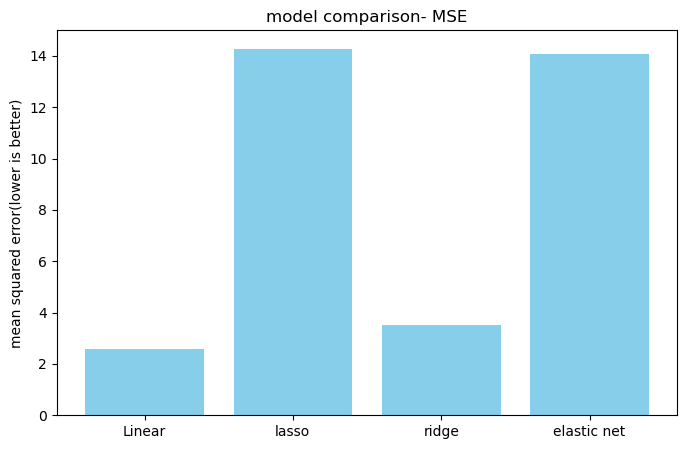

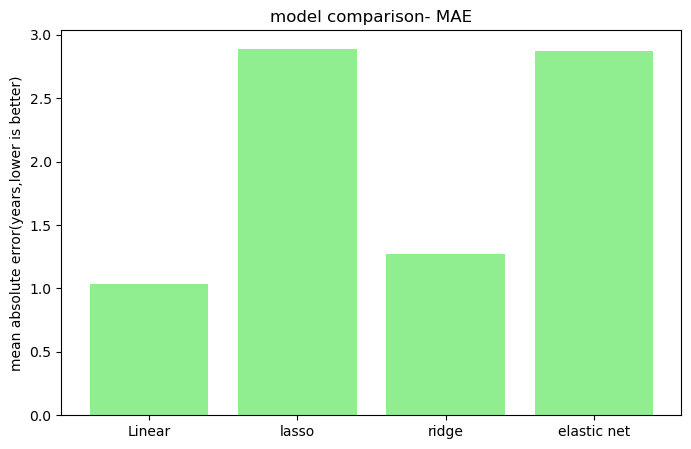

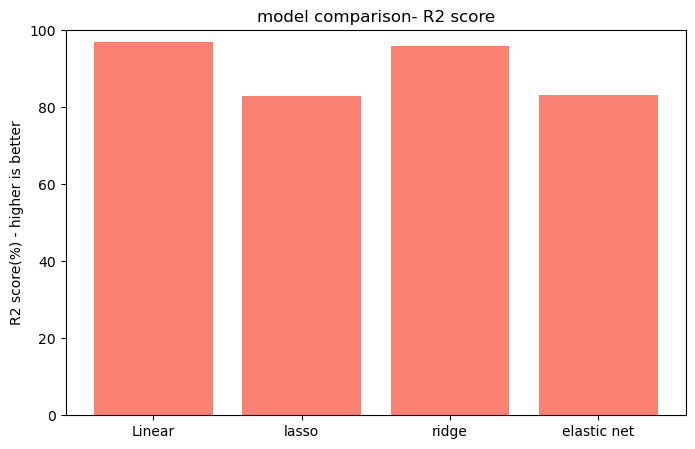

In [64]:
mse_scores={
    "Linear": lr_mse,
    "lasso": la_mse,
    "ridge": ri_mse,
    "elastic net": el_mse
}


mae_scores={
    "Linear": lr_mae,
    "lasso": la_mae,
    "ridge": ri_mae,
    "elastic net": el_mae
}

r2_scores={
    "Linear": lr_r2score*100,
    "lasso": la_r2score*100,
    "ridge": ri_r2score*100,
    "elastic net": el_r2score*100
}


#Plot MSE

plt.figure(figsize=(8,5))
plt.bar(mse_scores.keys(), mse_scores.values(),
       color="skyblue")
plt.title("model comparison- MSE")
plt.ylabel("mean squared error(lower is better)")
plt.show()


#plot mae
plt.figure(figsize=(8,5))
plt.bar(mae_scores.keys(), mae_scores.values(),
       color="lightgreen")
plt.title("model comparison- MAE")
plt.ylabel("mean absolute error(years,lower is better)")
plt.show()


#plot R2score
plt.figure(figsize=(8,5))
plt.bar(r2_scores.keys(), r2_scores.values(),
       color="salmon")
plt.title("model comparison- R2 score")
plt.ylabel("R2 score(%) - higher is better")
plt.ylim(0,100)
plt.show()







From this visualization it is clear that the Linear regression model is our best performing model

In [65]:
#retrieving countries column
Country_cols=[col for col in df.columns if col.startswith("Country_")]
df['Country']= df[Country_cols].idxmax(axis=1).str.replace("Country_","")

In [67]:
df['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
 

In [69]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ',
       'Polio',
       ...
       'Country_Turkey', 'Country_Turkmenistan', 'Country_Uganda',
       'Country_Ukraine', 'Country_Uruguay', 'Country_Uzbekistan',
       'Country_Vanuatu', 'Country_Zambia', 'Country_Zimbabwe', 'Country'],
      dtype='object', length=150)

In [70]:
#predicted expectancy

df['predicted_life_expectancy']=linear_model.predict(X)

results= df[['Year',"Country","Life expectancy ","predicted_life_expectancy"]]
pd.set_option('display.max_rows', None)


In [71]:
results

,Year,Country,Life expectancy,predicted_life_expectancy
0,2015,Albania,65.0,60.682676
1,2014,Albania,59.9,60.415300
2,2013,Albania,59.9,60.173524
3,2012,Albania,59.5,59.915303
4,2011,Albania,59.2,59.610730
5,2010,Albania,58.8,59.245470
6,2009,Albania,58.6,58.896653
7,2008,Albania,58.1,58.644792
8,2007,Albania,57.5,58.347126
9,2006,Albania,57.3,58.003659
